In [27]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_data, clinical_data, how ="outer",on="Mouse ID")


# Display the data table for preview
combined_mouse_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [28]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
average_tumor_volume = combined_mouse_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
avg_tumor_df = pd.DataFrame(average_tumor_volume).rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Preview DataFrame
avg_tumor_df.head()

Average Tumor Volume (mm3)
Drug      Timepoint                            
Capomulin 0                           45.000000
          5                           44.266086
          10                          43.084291
          15                          42.064317
          20                          40.716325

In [29]:
avg_tumor_df.head()

Average Tumor Volume (mm3)
Drug      Timepoint                            
Capomulin 0                           45.000000
          5                           44.266086
          10                          43.084291
          15                          42.064317
          20                          40.716325

In [30]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors_tumor_vol = combined_mouse_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
std_err_tumor_vol_df = pd.DataFrame(standard_errors_tumor_vol).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Standard Errors (mm3)"})



In [31]:
# Preview DataFrame
std_err_tumor_vol_df.head()


Tumor Volume Standard Errors (mm3)
Drug      Timepoint                                    
Capomulin 0                                    0.000000
          5                                    0.448593
          10                                   0.702684
          15                                   0.838617
          20                                   0.909731

In [32]:
# Minor Data Munging to Re-Format the Data Frames
reformat_tumor_df = avg_tumor_df.reset_index()
munged_avg_tumor_df = reformat_tumor_df.pivot(index="Timepoint", columns ="Drug",values="Average Tumor Volume (mm3)")


In [34]:
# Preview that Reformatting worked
munged_avg_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


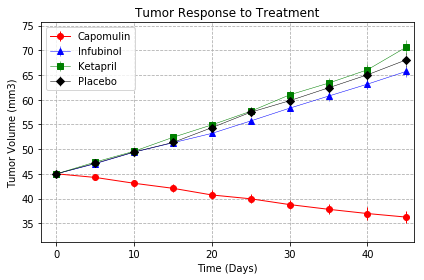

In [35]:
# Generate the Plot (with Error Bars)
x_axis = munged_avg_tumor_df.index.values

#creating scatter plot for Drug Campomulin  Infubinol, Ketapril, and Placebo
drug_to_plot = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
capo_handle = plt.errorbar(x_axis, munged_avg_tumor_df["Capomulin"].values, yerr = std_err_tumor_vol_df["Tumor Volume Standard Errors (mm3)"]["Capomulin"],
            color="red", marker="o",linewidth=1, alpha=1)

infu_handle = plt.errorbar(x_axis, munged_avg_tumor_df["Infubinol"].values, yerr = std_err_tumor_vol_df["Tumor Volume Standard Errors (mm3)"]["Infubinol"],
            color="blue", marker="^", lw = 0.5)

keta_handle = plt.errorbar(x_axis, munged_avg_tumor_df["Ketapril"].values, yerr = std_err_tumor_vol_df["Tumor Volume Standard Errors (mm3)"]["Ketapril"],
            color="green",marker="s", lw = 0.5)


placeb_handle = plt.errorbar(x_axis, munged_avg_tumor_df["Placebo"].values, yerr = std_err_tumor_vol_df["Tumor Volume Standard Errors (mm3)"]["Placebo"],
            color="black",marker="D", lw = 0.5)

#find the max and min value for y-axis
max_y_axis_value = max(munged_avg_tumor_df["Capomulin"].values)
min_y_axis_value = min(munged_avg_tumor_df["Capomulin"].values)
for drug in drug_to_plot:
    if(max(munged_avg_tumor_df[drug].values) > max_y_axis_value):
        max_y_axis_value = max(munged_avg_tumor_df[drug].values)
    if(min(munged_avg_tumor_df[drug].values) < min_y_axis_value):
        min_y_axis_value = max(munged_avg_tumor_df[drug].values)  

plt.xlim(-2, max(x_axis) +1)
plt.ylim(min_y_axis_value -5 , max_y_axis_value + 5)
plt.title("Tumor Response to Treatment", fontsize=12)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)

plt.grid(linestyle="dashed")
plt.legend(drug_to_plot, loc = "best")
plt.tight_layout()

# Save the Figure
plt.savefig("Images/tumor_response_to_treatement.png")




In [36]:
# Show the Figure
plt.show();

## Metastatic Response to Treatment

In [37]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
average_metastatic_site = combined_mouse_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
avg_metas_df = pd.DataFrame(average_metastatic_site).rename(columns={"Metastatic Sites": "Average Metastatic Sites"})





In [38]:
# Preview DataFrame
avg_metas_df.head()

Average Metastatic Sites
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.160000
          10                         0.320000
          15                         0.375000
          20                         0.652174

In [39]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_errors_metasite = combined_mouse_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
std_err_metasite_df = pd.DataFrame(standard_errors_metasite).rename(columns={"Metastatic Sites": "Metastatic Sites Standard Errors"})



In [40]:
# Preview DataFrame
std_err_metasite_df.head()

Metastatic Sites Standard Errors
Drug      Timepoint                                  
Capomulin 0                                  0.000000
          5                                  0.074833
          10                                 0.125433
          15                                 0.132048
          20                                 0.161621

In [41]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metasite_df = avg_metas_df.reset_index()
munged_avg_metasite_df = reformat_metasite_df.pivot(index="Timepoint", columns ="Drug",values="Average Metastatic Sites")




In [42]:
# Preview that Reformatting worked
munged_avg_metasite_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


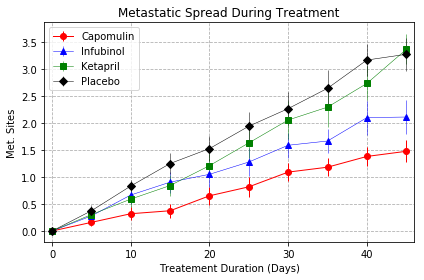

In [43]:
# Generate the Plot (with Error Bars)
x_axis = munged_avg_metasite_df.index.values

#creating scatter plot for Drug Campomulin  Infubinol, Ketapril, and Placebo
drug_to_plot = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
capo_handle = plt.errorbar(x_axis, munged_avg_metasite_df["Capomulin"].values, yerr = std_err_metasite_df["Metastatic Sites Standard Errors"]["Capomulin"],
            color="red", marker="o",linewidth=1, alpha=1)

infu_handle = plt.errorbar(x_axis, munged_avg_metasite_df["Infubinol"].values, yerr = std_err_metasite_df["Metastatic Sites Standard Errors"]["Infubinol"],
            color="blue", marker="^", lw = 0.5)

keta_handle = plt.errorbar(x_axis, munged_avg_metasite_df["Ketapril"].values, yerr = std_err_metasite_df["Metastatic Sites Standard Errors"]["Ketapril"],
            color="green",marker="s", lw = 0.5)


placeb_handle = plt.errorbar(x_axis, munged_avg_metasite_df["Placebo"].values, yerr = std_err_metasite_df["Metastatic Sites Standard Errors"]["Placebo"],
            color="black",marker="D", lw = 0.5)

#find the max and min value for y-axis
max_y_axis_value = max(munged_avg_metasite_df["Capomulin"].values)
min_y_axis_value = min(munged_avg_metasite_df["Capomulin"].values)
for drug in drug_to_plot:
    if(max(munged_avg_metasite_df[drug].values) > max_y_axis_value):
        max_y_axis_value = max(munged_avg_metasite_df[drug].values)
    if(min(munged_avg_metasite_df[drug].values) < min_y_axis_value):
        min_y_axis_value = max(munged_avg_metasite_df[drug].values)  

plt.xlim(-1, max(x_axis) +1)
plt.ylim(min_y_axis_value - 0.2 , max_y_axis_value + 0.5)
plt.title("Metastatic Spread During Treatment", fontsize=12)
plt.xlabel("Treatement Duration (Days)", fontsize=10)
plt.ylabel("Met. Sites", fontsize=10)

plt.grid(linestyle="dashed")
plt.legend(drug_to_plot, loc = "best")
plt.tight_layout()

# Save the Figure
plt.savefig("Images/metastatic_spread_during_treatement.png")

# Show the Figure
plt.show()

In [44]:
plt.show()

## Survival Rates

In [45]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_total = combined_mouse_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_total).rename(columns={"Mouse ID": "Mouse Count"})



In [46]:
# Preview DataFrame
mouse_count_df.head()



Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [47]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mouse_df = mouse_count_df.reset_index()
munged_mouse_count_df = reformat_mouse_df.pivot(index="Timepoint", columns ="Drug",values="Mouse Count")


In [48]:
# Preview the Data Frame
munged_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


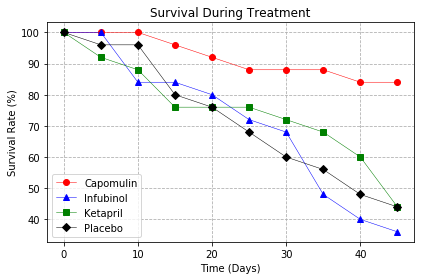

In [49]:
# Generate the Plot (Accounting for percentages)
x_axis = munged_mouse_count_df.index.values

#creating scatter plot for Drug Campomulin  Infubinol, Ketapril, and Placebo
drug_to_plot = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
mice_capo_handle, = plt.plot(x_axis, (munged_mouse_count_df["Capomulin"].values/munged_mouse_count_df["Capomulin"].values[0])*100,color="red", marker="o",lw=0.5)

mice_infu_handle, = plt.plot(x_axis, (munged_mouse_count_df["Infubinol"].values/munged_mouse_count_df["Infubinol"].values[0])*100,color="blue", marker="^", lw = 0.5)

mice_keta_handle, = plt.plot(x_axis, (munged_mouse_count_df["Ketapril"].values/munged_mouse_count_df["Ketapril"].values[0])*100,color="green",marker="s", lw = 0.5)


mice_placeb_handle, = plt.plot(x_axis, (munged_mouse_count_df["Placebo"].values/munged_mouse_count_df["Placebo"].values[0])*100,color="black",marker="D", lw = 0.5)


plt.title("Survival During Treatment", fontsize=12)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Survival Rate (%)", fontsize=10)

plt.grid(linestyle="dashed")
plt.legend(drug_to_plot, loc = "best")
plt.tight_layout()

# Save the Figure
plt.savefig("Images/mouse_survival_count.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [50]:
# Calculate the percent changes for each drug
drug_percent_change=((munged_avg_tumor_df.iloc[-1]-munged_avg_tumor_df.iloc[0])/munged_avg_tumor_df.iloc[0])*100



In [51]:
# Display the data to confirm
drug_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

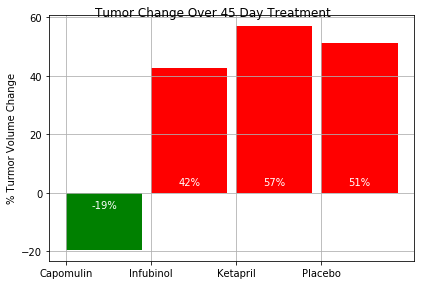

In [52]:
# Store all Relevant Percent Changes into a Tuple
relevant_Drug = ([drug_percent_change.axes[0][0], drug_percent_change[0]],
                [drug_percent_change.axes[0][1], drug_percent_change[1]],
                [drug_percent_change.axes[0][3], drug_percent_change[3]],
                [drug_percent_change.axes[0][5], drug_percent_change[5]])


# Splice the data between passing and failing drugs
passing = []
failing = []

for drug in relevant_Drug:
    if drug[1]< 0:
        failing.append(drug)
    else:
        passing.append(drug)

# Orient widths. Add labels, tick marks, etc. 
drug_label = [drug[0] for drug in relevant_Drug]
drug_percent = [drug[1] for drug in relevant_Drug]
fig, ax = plt.subplots()
bar = ax.bar(np.arange(len(drug_percent)),
             drug_percent,
             align = "edge",
             width = .9,
             color = ["green", "red", "red", "red"])

ax.set_xticks(np.arange(len(drug_label)))
ax.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"])

ax.set_yticks(np.arange(math.floor(min(drug_percent)),
                        math.floor(max(drug_percent)) + 20,
                        20))
ax.set_ylabel("% Turmor Volume Change")
fig.suptitle("Tumor Change Over 45 Day Treatment")
plt.grid(True, which = "major")

# Use functions to label the percentages of changes
def relabel(rects):

    for rect in rects:
        height = rect.get_height()
        if(height > 0):
            label_height = 2
        else:
            label_height = -6
        ax.text(rect.get_x() + rect.get_width()/2., label_height,
                f"{'%d' % int(height)}%",
                ha = 'center', va = 'bottom', color = 'white')

# Call functions to implement the function calls
relabel(bar)

plt.tight_layout()
# Save the Figure
plt.savefig("Images/tumor_change_summary.png")

# Show the Figure
plt.show()

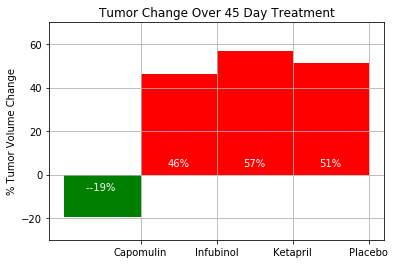